In [2]:
%pylab inline --no-import-all
plt.rc('font', family='serif', serif='Times',size=20)
plt.rc('text', usetex=True)
plt.rc('xtick', labelsize=20)
plt.rc('xtick.major', size=10)
plt.rc('ytick.major', size=10)
plt.rc('ytick', labelsize=20)
plt.rc('axes', labelsize=20)
plt.rc('figure',titlesize=20)
plt.rc('image',origin='lower',interpolation='nearest')


Populating the interactive namespace from numpy and matplotlib


# First find the coordinates of all the psflets on the detector

In [4]:
npsflets = 100
pixsize = 13
lensletsize=174.

x = np.arange(-npsflets//2,npsflets//2)*lensletsize/pixsize
x,y = np.meshgrid(x,x)

interlace = 4
theta = np.arcsin(1./np.sqrt(interlace**2+1))

# rotated coordinates on the detector
rx = np.cos(theta)*x - np.sin(theta)*y
ry = np.sin(theta)*x + np.cos(theta)*y

# Calculate the minimum distance between each pixel and the closest  psflet

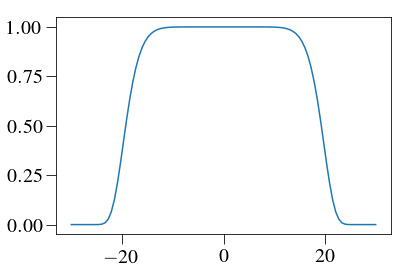

In [18]:
x=np.linspace(-30,30,100)
plt.plot(x,np.exp(-(x/20)**10))


In [ ]:
plt

In [20]:
# number of detector pixels
npix = 200

# Number of pixels in a microspectrum; the microspectrum will be made using twice this number of psflets
mpix = 0.5

rx = np.reshape(rx,-1)
ry = np.reshape(ry,-1)
detx = np.arange(npix)-npix//2
detx,dety = np.meshgrid(detx,detx)

# calculate distance to the psflets for various shifts in the x axis, representing the microspectrum
d = np.array([np.amin(np.sqrt((rx[:,np.newaxis,np.newaxis]-detx-dx)**2+(ry[:,np.newaxis,np.newaxis]-dety)**2),axis=0) \
     for dx in np.linspace(-mpix//2,mpix//2,mpix*2)])


/Users/mrizzo/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  del sys.path[0]


# Apply a gaussian function to that distance

In [10]:
fwhm = 2.
sig = fwhm/2.35
gaussmap = np.sum(np.exp(-d**2/2./sig**2),axis=0)

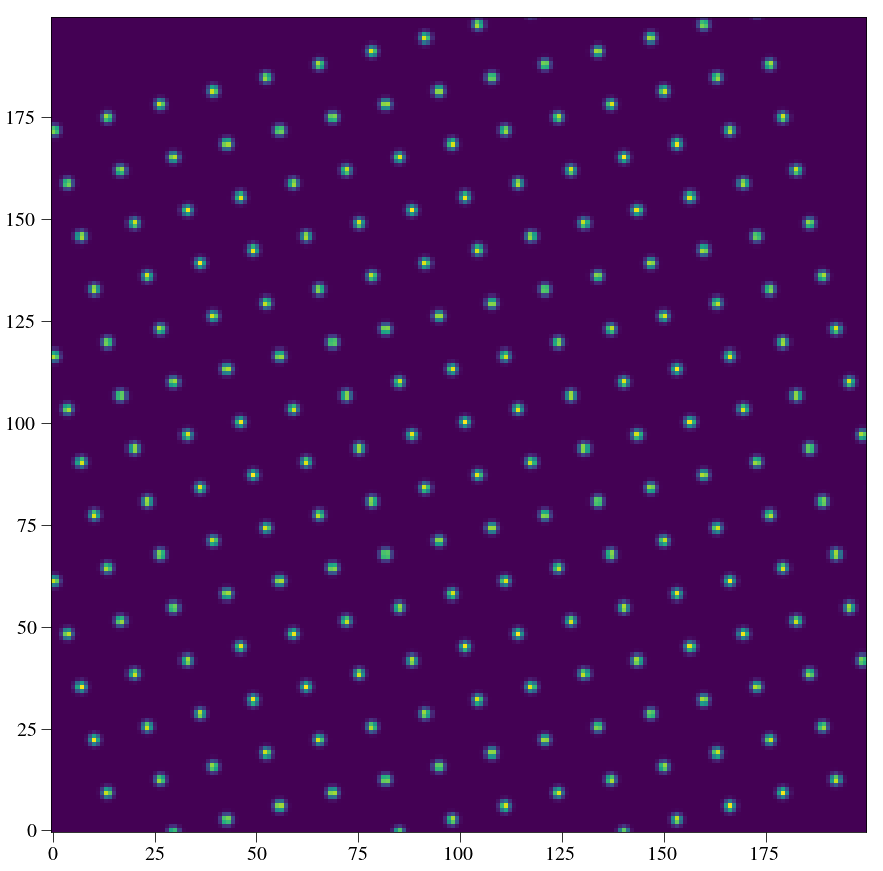

In [11]:
plt.figure(figsize=(15,15))
plt.imshow(gaussmap)

# Using flattop gaussian

In [4]:
npix = 1000
fwhm = 2.
sig = fwhm/2.35

rx = np.reshape(rx,-1)
ry = np.reshape(ry,-1)
detx = np.arange(npix)-npix//2
detx,dety = np.meshgrid(detx,detx)

gaussmap = np.zeros((npix,npix))

# calculate distance to the psflets for various shifts in the x axis, representing the microspectrum
# d = np.amin(np.sqrt((rx[:,np.newaxis,np.newaxis]-detx-dx)**2+(ry[:,np.newaxis,np.newaxis]-dety)**2),axis=0)
for i in range(len(rx)):    
    dx = (rx[i,np.newaxis,np.newaxis]-detx)
    dy = (ry[i,np.newaxis,np.newaxis]-dety)
    gaussmap+=np.exp(-(dy/20)**20-(dx)**2/2./sig**2)
# dx = np.amin((rx[:,np.newaxis,np.newaxis]-detx),axis=0)
# dy = np.amin((ry[:,np.newaxis,np.newaxis]-dety),axis=0)

# gaussmap = np.sum(np.exp(-(dy/20)**20-(dx)**2/2./sig**2),axis=0)
plt.figure(figsize=(15,15))
plt.imshow(gaussmap)
plt.colorbar()

KeyboardInterrupt: 

In [ ]:
npix = 1000
fwhm = 2.
sig = fwhm/2.35
rx = np.reshape(rx,-1)
ry = np.reshape(ry,-1)
detx = np.arange(npix)-npix//2
detx,dety = np.meshgrid(detx,detx)

d = np.amin(np.sqrt((rx[:,np.newaxis,np.newaxis]-detx)**2+(ry[:,np.newaxis,np.newaxis]-dety)**2))
gaussmap = np.sum(np.exp(-d**2/2./sig**2),axis=0)

In [15]:
def flatgausspsf(sizex,sizey,fwhmx,fwhmy,offx,offy,transpose=False):
    _x = np.arange(sizex) - sizex // 2 + offx
    _y = np.arange(sizey) - sizey // 2 + offy
    _x, _y = np.meshgrid(_x, _y)
    sigmax = fwhmx / 2.35
    sigmay = fwhmy / 2.35
    psflet = np.exp(-(_x/np.sqrt(2)/sigmax)**2)*np.exp(-(_y/np.sqrt(2)/sigmay)**10)
    psflet/=np.sum(psflet)
    if transpose:
        return psflet.T
    
    return psflet


xdim = 4096
xindx = np.arange(-408 / 2, 408 / 2)
xindx, yindx = np.meshgrid(xindx, xindx)
X = np.reshape(xindx,-1)
Y = np.reshape(yindx,-1)
# A = np.array([np.ones_like(X), X, Y, X**2, X**2*Y, X**2*Y**2, Y**2, X*Y**2, X*Y]).T
# A = np.array([np.ones_like(X), X, Y, X**2, Y**2, X*Y, X**2*Y, X*Y**2]).T
A = np.array([np.ones_like(X), X, Y]).T

x0=0.32
spacing = 174./13.
interlace=2
phi = -np.arcsin(1./np.sqrt(interlace**2+1))
coeffx = np.array([xdim/2,spacing*np.cos(phi),spacing*np.sin(phi)])
coeffy = np.array([xdim/2+x0,-spacing*np.sin(phi),spacing*np.cos(phi)])

ycen = np.reshape(np.dot(A,coeffy),yindx.shape)
xcen = np.reshape(np.dot(A,coeffx),xindx.shape)


gsize = 20
fwhm=2
lx = xdim+2*gsize
detectorFrame = np.zeros((lx,lx))
ry = np.reshape(ycen,-1)
rx = np.reshape(xcen,-1)
for i in range(len(ry)):
    yi = ry[i]+gsize
    xi = rx[i]+gsize
    xmin = int(xi)-gsize
    xmax = xmin+2*gsize
    ymin = int(yi)-gsize
    ymax = ymin+2*gsize
    if ymin>0 and xmin>0 and xmax<lx and ymax<lx:
        dx = xi - int(xi)
        dy = yi - int(yi)
        detectorFrame[ymin:ymax,xmin:xmax]+=flatgausspsf(sizex=2*gsize,sizey=2*gsize,fwhmx=fwhm,fwhmy=20,offx=-dx,offy=-dy)

detectorFrame = detectorFrame[gsize:-gsize,gsize:-gsize]
from astropy.io import fits
out = fits.HDUList(fits.PrimaryHDU(detectorFrame.astype(np.float32)))
out.writeto('/Users/mrizzo/Downloads/H4RG.fits',overwrite=True)


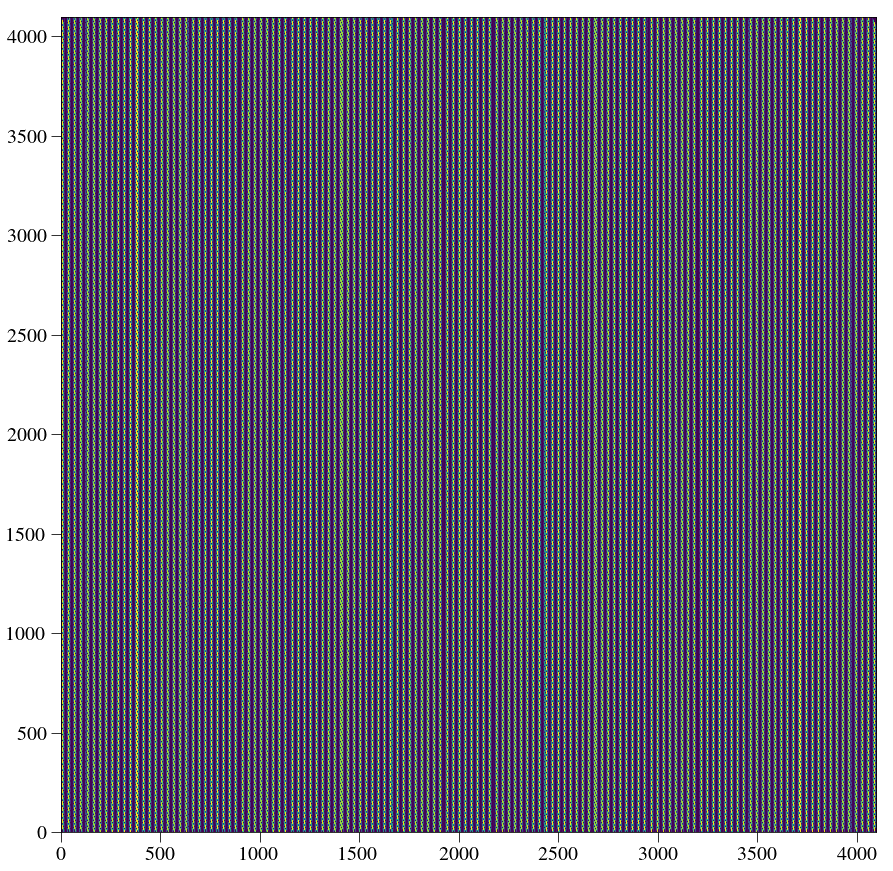

In [16]:
plt.figure(figsize=(15,15))
plt.imshow(detectorFrame)